<a href="https://colab.research.google.com/github/johyunkang/MLwithPythonCookbook/blob/main/9_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9 특성 추출을 사용한 차원 축소

9.1 주성분을 사용해 특성 줄이기

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)의 하이퍼파라미터 
- n_components 
    - 0 < n < 1 : 해당 비율의 분산을 유지할 수 있는 최소한의 특성 개수를 반환. 0.95와 0.99가 자주 사용
    - n >=1 : 해당 수 만큼의 주성분을 반환
- whiten=True : 각 주성분의 값을 평균이 0이고 분산이 1이 되도록 변환 (False가 default). 주성분에 투영된 특성의 스케일을 맞추는 역할
- solver="randomized" : 아주 짧은 시간 안에 첫번째 주성분을 찾아주는 확률적 알고리즘을 사용

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


(1797, 64)

원본 특성 개수: (1797, 64)
pca 후 특성 개수: (1797, 54)


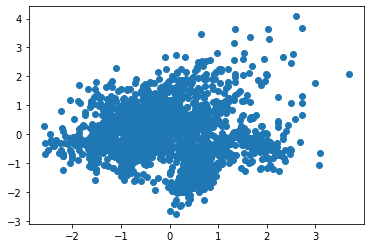

화이트닝 되어서 두 특성의 스케일이 비슷함.


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

digits = datasets.load_digits()
df = pd.DataFrame(digits.data)
display(df.head())
display(df.describe())

features = StandardScaler().fit_transform(df)

display(features.shape)

# 99%의 분산을 유지하도록 PCA 클래스 객체 생성
# n_componnts : 1
pca = PCA(n_components=0.99, whiten=True) # whiten (default=False) : Whitening 의 준말
features_pca = pca.fit_transform(features)

print('원본 특성 개수:', features.shape)
print('pca 후 특성 개수:', features_pca.shape)

from matplotlib import pyplot as plt
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()
print('화이트닝 되어서 두 특성의 스케일이 비슷함.')

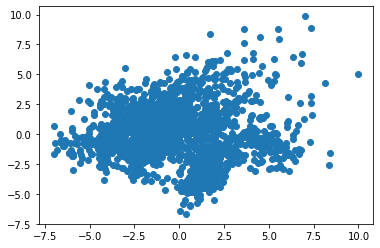

화이트닝 옵션을 적용하지 않아 평균은 0이지만 스케일은 맞춰지지 않음


In [2]:
pca_no_whiten = PCA(n_components=0.99)
features_no_whiten = pca_no_whiten.fit_transform(features)
plt.scatter(features_no_whiten[:, 0], features_no_whiten[:, 1])
plt.show()
print('화이트닝 옵션을 적용하지 않아 평균은 0이지만 스케일은 맞춰지지 않음')

In [3]:
print('PCA 적용된 컴포넌트 갯수:', pca_no_whiten.components_.shape)

PCA 적용된 컴포넌트 갯수: (54, 64)


`n_components` 파라미터를 지정하지 않으면 특성 개수만큼 주성분이 만들어짐

주성분에 의해 설명된 분산은 `explained_variance_ratio_` 속성에 저장되어 있음

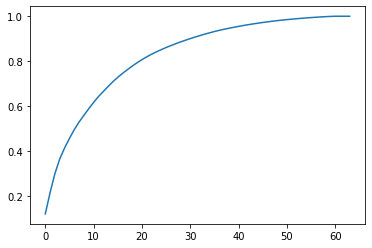

약 30개의 주성분으로도 80% 이상의 분산을 유지하고 있음


올바르게 분산으로 계산하기 위해서는 원본 데이터를 그대로 PCA로 주입하는것이 좋음


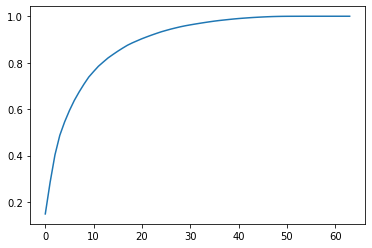

In [4]:
import numpy as np
pca = PCA(whiten=True).fit(features)
# cumsum 을 이용하여 누적합 구하기
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

print('약 30개의 주성분으로도 80% 이상의 분산을 유지하고 있음')

print('\n\n올바르게 분산으로 계산하기 위해서는 원본 데이터를 그대로 PCA로 주입하는것이 좋음')
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기

feature shape: (1000, 2)
feature sample 5: [[ 0.23058395 -0.10671314]
 [-0.0834218  -0.22647078]
 [ 0.9246533  -0.71492522]
 [-0.10217077 -0.89283523]
 [-1.01719242  0.24737775]]
y shape: (1000,) , y sample: [1 1 0 0 0]


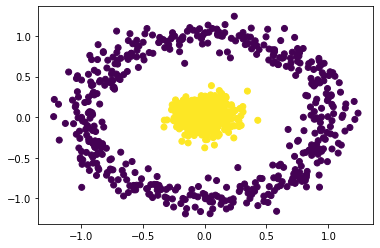

In [5]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

# factor : R2/R1, noise=std
features, y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
print('feature shape:', features.shape)
print('feature sample 5:', features[:5])
print('y shape:', y.shape, ', y sample:', y[:5])

plt.scatter(features[:, 0], features[:, 1], c=y) # c: color
plt.show()

In [6]:
# 방사 기저 함수 (radius basis function, RBF)를 사용하여 커널PCA를 적용
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1) # rbf | poly | sigmoid | linear
features_kpca = kpca.fit_transform(features)
print('원본 피처 수:', features.shape)
print('줄어든 피처 수:', features_kpca.shape)

원본 피처 수: (1000, 2)
줄어든 피처 수: (1000, 1)


## 9.3 클래스 분리를 최대화하여 특성 줄이기 

선형판별분석(linear discriminant analysis, `LDA`)을 사용하여 클래스를 최대한 분리하는 성분 축으로 특성을 투영

`LDA`는 분류 알고리즘이지만 차원 축소에도 자주 사용되는 기법

LDA는 특성 공간을 저차원 공간으로 투영한다는 점에서 주성분분석(`PCA`)와 비슷함.

In [7]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target
print('feature shape:', features.shape, ', sample:', features[:3])
print('target shape:', target.shape, ', sample:', target[:3])
df = pd.DataFrame(features)
df.head(3)

feature shape: (150, 4) , sample: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
target shape: (150,) , sample: [0 0 0]


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [8]:
lda = LinearDiscriminantAnalysis(n_components=1)
feature_lda = lda.fit(features, target).transform(features)

print('원본 특성 개수:', features.shape)
print('줄어든 특성 개수:', feature_lda.shape)
print('evr:', lda.explained_variance_ratio_)

원본 특성 개수: (150, 4)
줄어든 특성 개수: (150, 1)
evr: [0.9912126]


- LDA는 분류 알고리즘이지만 차원 축소에도 자주 사용되는 기법
- LDA는 특성 공간을 저차원 공간으로 투영한다는 점에서 주성분분석(PCA)과 비슷함
- PCA가 데이터에서 분산이 최대인 성분 축에만 관심이 있는 반면
- LDA는 클래스 간의 차이를 최대화하는 추가적인 목적을 가짐

## 9.4 행렬 분해를 사용하여 특성 줄이기

비음수 행렬분해 (non-negative matrix factorization; NMF)를 사용하여 특성 행렬의 차원을 축소

In [11]:
from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()

features = digits.data
print('sample features:', features[:3])

# NMF를 만들고 학습 후 적용
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력
print('원본 특성개수 :', features.shape)
print('줄어든 특성개수:', features_nmf.shape)

sample features: [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


원본 특성개수 : (1797, 64)
줄어든 특성개수: (1797, 10)


/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


- `NMF`는 `선형차원축소`를 위한 **비지도 학습 기법**
- 샘플과 특성 사이에 잠재되어 있는 관계를 표현하는 행렬로 특성 행렬을 분해
- 즉, 곱해서 거의 원본 행렬이 되는 여러 개의 행렬로 나눔

## 9.5 희소한 데이터의 특성 줄이기

- TSVD (truncated singular value decomposition)를 사용합니다.

In [12]:
# 잘 사용하지 않을 것 같아 건너뜀
from sklearn.decomposition import TruncatedSVD